In [46]:
import os
import csv
# root = '/Users/biraj/Desktop/Github/image-caption-analysis/sample_image/'
root = '/Users/biraj/Downloads/ImageAnnotations/'
image_paths = []

# Specify the allowed image extensions
allowed_extensions = {'.png', '.jpg', '.jpeg'}

# Walk through the directory and add only image files with the allowed extensions
for path, subdirs, files in os.walk(root):
    for name in files:
        # Check the file extension and add it to the list if it's an image
        if any(name.lower().endswith(ext) for ext in allowed_extensions):
            image_paths.append(os.path.join(path, name))

print(image_paths)  # To verify the image paths

['/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img41.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img57.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img94.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img82.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img1.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img64.jpg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img20.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img98.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img77.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img61.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img36.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img37.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img49.jpg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img99.jpeg', '/Users/biraj/Downloads/ImageAnnotations/cat1/cat1_img76.jpeg', '/Users/biraj/Downloads/ImageAnnotations/c

In [47]:
print(len(image_paths))

600


In [48]:
from transformers import AutoProcessor, AutoModelForCausalLM
import requests
from PIL import Image
import matplotlib.pyplot as plt

# GIT (Generative Image-to-Text) by Microsoft

a worker works on a tire in a village


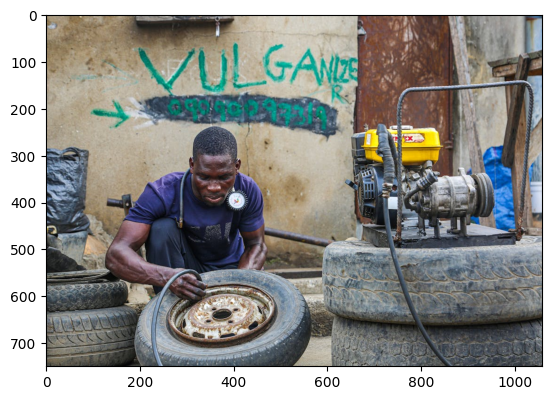

In [49]:
processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco")
image = Image.open('./sample_image/cat4_img12.jpeg')
plt.imshow(image)
pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)


In [50]:

processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco")

results = []

def predict_step(image_paths, output_csv_path):
    for image_path in image_paths:
        image = Image.open(image_path)
        pixel_values = processor(images=image, return_tensors="pt").pixel_values
        generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
        generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        results.append({"image_name": image_path.split('/')[-1].split('.')[0], "caption": generated_caption})
        with open(output_csv_path, mode="w", newline="") as file:
            writer = csv.DictWriter(file, fieldnames=["image_name", "caption"])
            writer.writeheader()  
            writer.writerows(results) 



In [51]:
output_csv_path = "/Users/biraj/Desktop/Github/image-caption-analysis/git.csv"  # Output CSV file path
predict_step(image_paths,output_csv_path)